In [1]:
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import torch
from torch.utils.data import DataLoader
from utils_data import render_optical_flow_data, plot_pair, plot_sparse_vecs
from utils_train import get_dataloaders
import matplotlib.pyplot as plt

from DatasetClass import CarlaUnsupervised

In [8]:
data_root = "/storage/remote/atcremers40/motion_seg/datasets/Opt_flow_pixel_preprocess/"
dataset = CarlaUnsupervised(data_root)

dataset_fraction = 0.1 #to be used in get_dataloaders
# train_loader, val_loader, test_loader = get_dataloaders(dataset, batch_size = 1)
# imgs, dynamic_flow, static_flow, depths = next(iter(train_loader))

imgs, dynamic_flow, static_flow, depths = dataset.__getitem__(36)

## Image loading

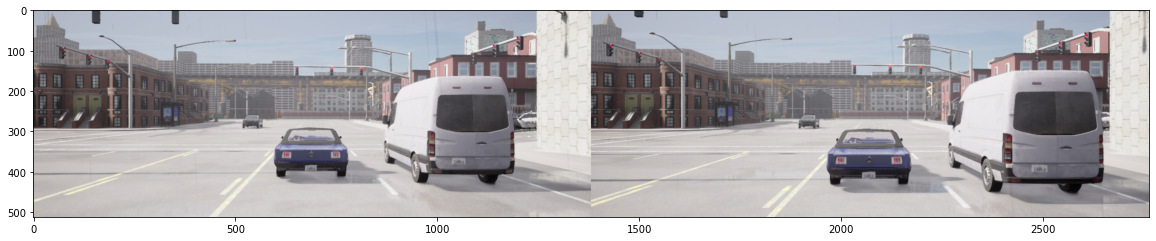

In [9]:
img1_np = np.transpose(imgs[:3].numpy(), axes=[1, 2, 0])
img2_np = np.transpose(imgs[3:].numpy(), axes=[1, 2, 0])

plot_pair(img1_np, img2_np, size=(20,8))

## Dynamic flow

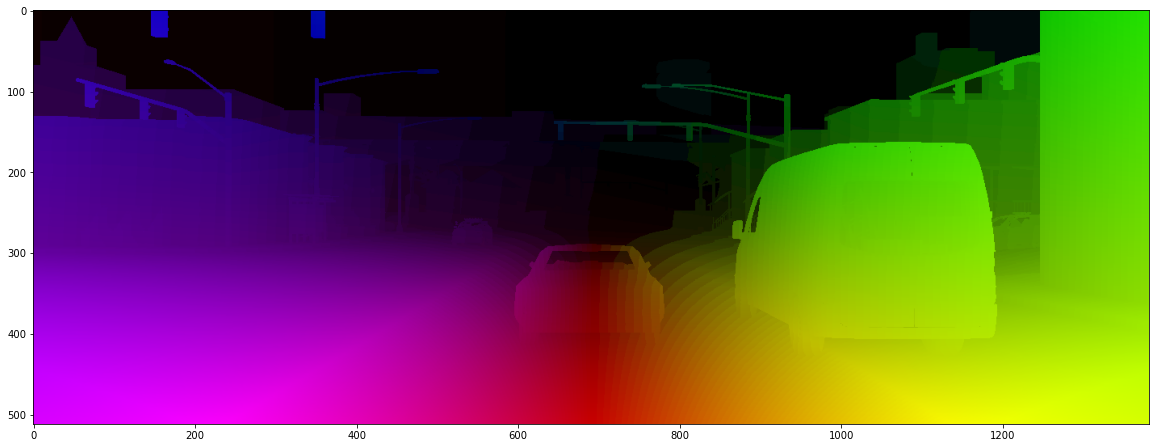

In [10]:
dynamic_flow_np = np.transpose(dynamic_flow.numpy(), axes=[1, 2, 0])

#Undo transformation and then correct
dynamic_flow_np[:, :, 0] /= (dynamic_flow_np.shape[1] * -0.5) #scaling from [-2,2] CARLA encoding -> [-1,1]
dynamic_flow_np[:, :, 1] /= (dynamic_flow_np.shape[0] * 0.5)

dynamic_flow_np[:, :, 0] *= (dynamic_flow_np.shape[1] * -0.5) 
dynamic_flow_np[:, :, 1] *= (dynamic_flow_np.shape[0] * 0.5)

render_optical_flow_data(dynamic_flow_np)

## Static flow

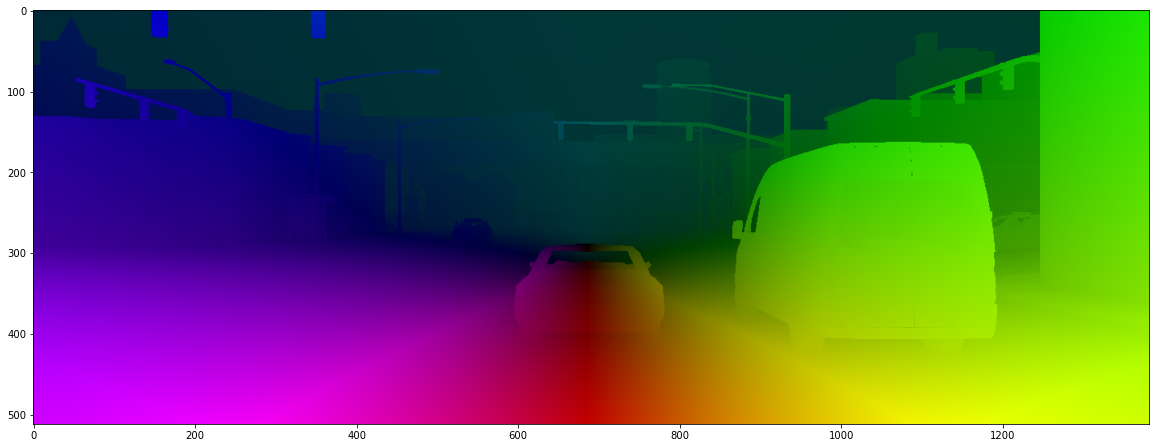

In [11]:
static_flow_np = np.transpose(static_flow.numpy(), axes=[1, 2, 0])
render_optical_flow_data(static_flow_np)

## Checking sparse vector field

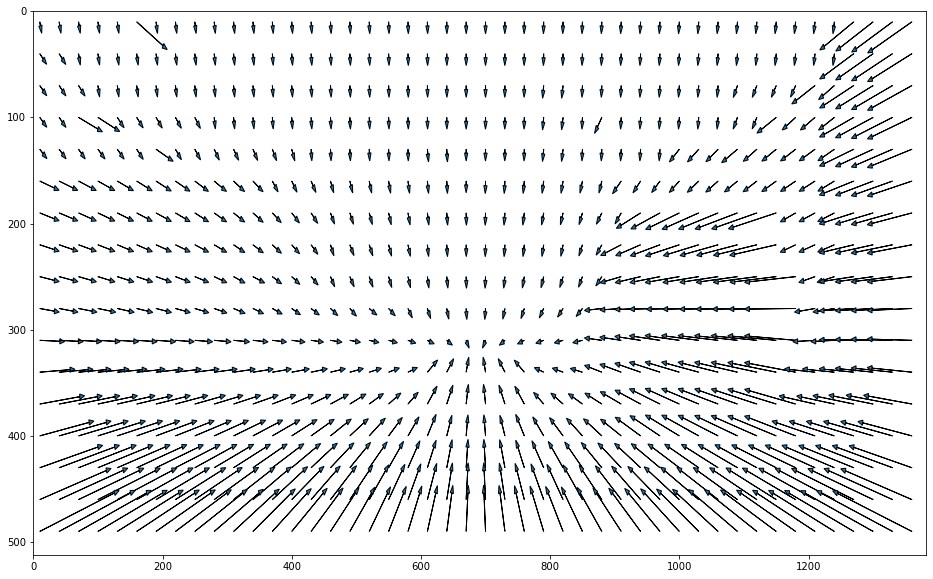

In [12]:
#Static flow
plot_sparse_vecs(static_flow_np, sparseness=30, cutoff=1)

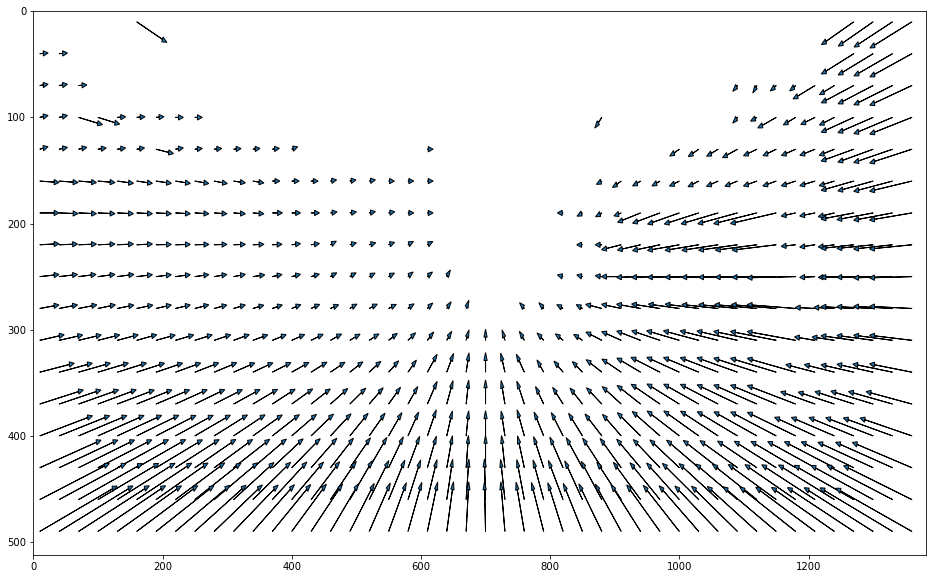

In [13]:
#Dynamic flow
plot_sparse_vecs(dynamic_flow_np, sparseness=30, cutoff=1)